<a href="https://colab.research.google.com/github/sierrame/GoogleColab-and-BigQuery/blob/main/rainfall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade google-cloud-bigquery

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.1/240.1 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: google-cloud-bigquery
    Found existing installation: google-cloud-bigquery 3.25.0
    Uninstalling google-cloud-bigquery-3.25.0:
      Successfully uninstalled google-cloud-bigquery-3.25.0


In [15]:
from google.cloud import bigquery
from google.colab import data_table
import bigframes.pandas as bpd


In [16]:
project = 'mysqlpractice-447611'  # Your Google Cloud Project ID
location = 'US'  # Dataset location

In [17]:
client = bigquery.Client(project=project, location=location)


In [18]:
data_table.enable_dataframe_formatter()


In [19]:
from google.colab import auth
auth.authenticate_user()


In [11]:
!pip install bigframes


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.9 MB/s eta 0:00:00


In [21]:
query = """
SELECT id3, rainfall
FROM `mysqlpractice-447611.surigao.surigao_table`
"""
query_job = client.query(query)
df = query_job.to_dataframe()  # Convert query results to Pandas DataFrame
print(df.head())


   id3  rainfall
0   22  0.028409
1   34  0.001015
2  105  2.409662
3   20  0.174510
4   26  0.389604


In [22]:
print(df.describe())  # Summary statistics
print(df['rainfall'].mean())  # Average rainfall
print(df['rainfall'].max())  # Maximum rainfall


              id3    rainfall
count       599.0  599.000000
mean        300.0    0.798349
std    173.060683    1.000000
min           1.0    0.000000
25%         150.5    0.140014
50%         300.0    0.472801
75%         449.5    1.053149
max         599.0    7.084913
0.7983494834256977
7.08491307349743


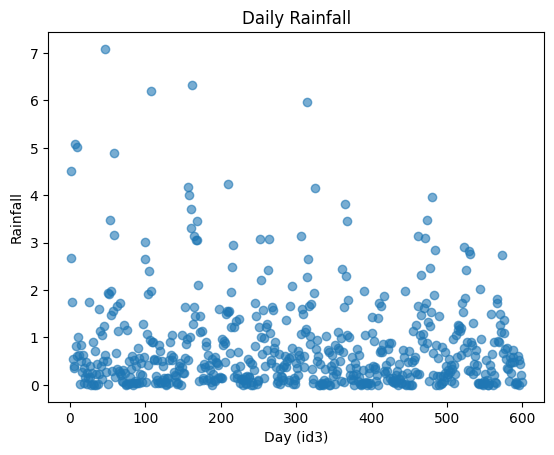

In [24]:
import matplotlib.pyplot as plt

plt.scatter(df['id3'], df['rainfall'], alpha=0.6)
plt.xlabel('Day (id3)')
plt.ylabel('Rainfall')
plt.title('Daily Rainfall')
plt.show()



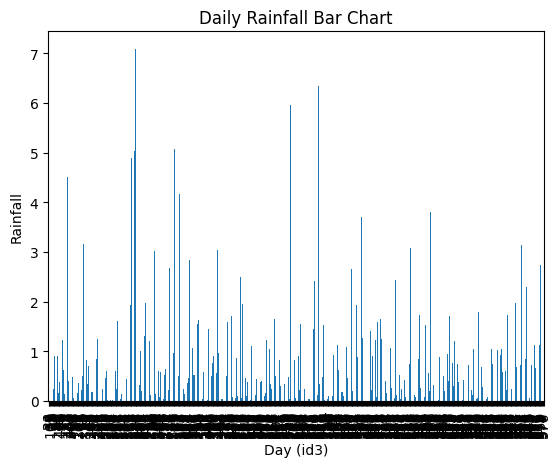

In [25]:
df.plot(kind='bar', x='id3', y='rainfall', legend=False)
plt.xlabel('Day (id3)')
plt.ylabel('Rainfall')
plt.title('Daily Rainfall Bar Chart')
plt.show()


In [27]:
df['month'] = (df['id3'] // 30) + 1  # Approximate months (assuming 30 days/month)
monthly_rainfall = df.groupby('month')['rainfall'].sum().reset_index()

print(monthly_rainfall)


    month   rainfall
0       1  29.697180
1       2  37.790600
2       3  12.342542
3       4  29.558180
4       5   9.929836
5       6  52.002024
6       7  19.956058
7       8  20.641924
8       9  30.372900
9      10  14.352453
10     11  39.030434
11     12  11.073284
12     13  23.010495
13     14  19.296065
14     15  10.243346
15     16  34.750875
16     17  19.009137
17     18  32.893457
18     19  14.029812
19     20  18.230740


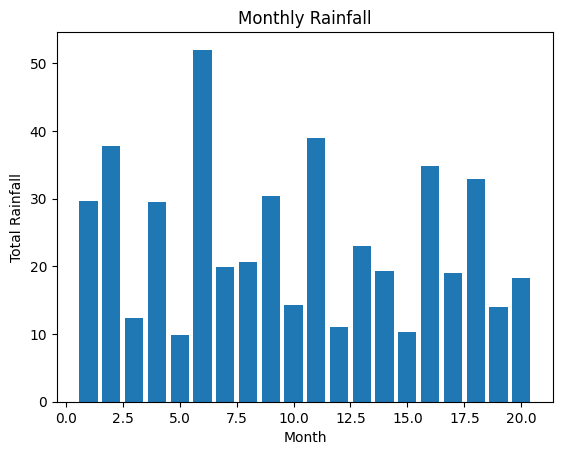

In [28]:
plt.bar(monthly_rainfall['month'], monthly_rainfall['rainfall'])
plt.xlabel('Month')
plt.ylabel('Total Rainfall')
plt.title('Monthly Rainfall')
plt.show()


### **1. Statistical Analysis of Trends and Seasonality**
We can use **statsmodels** to decompose the time series and identify trends and seasonality.

#### **Steps**:
1. Install the necessary library:
2. Import and decompose the time series:
3. Interpret results:

In [29]:
pip install statsmodels


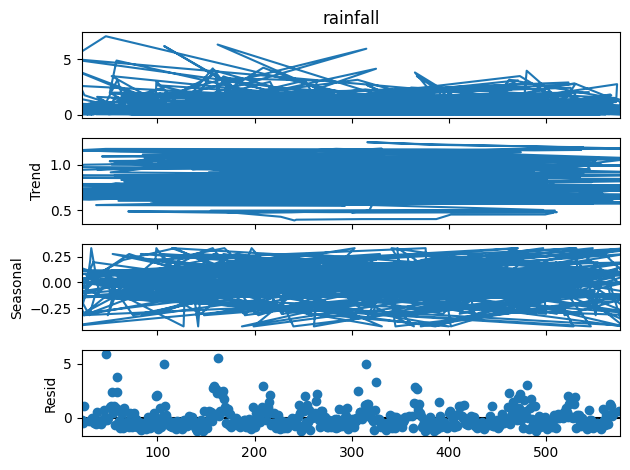

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'id3' is continuous day data
df.set_index('id3', inplace=True)  # Set 'id3' as index for time series
result = seasonal_decompose(df['rainfall'], model='additive', period=30)  # Approx. monthly period

# Plot decomposition
result.plot()
plt.show()


### **2. Forecasting Using ARIMA (Autoregressive Integrated Moving Average)**
ARIMA is effective for time series forecasting.

#### **Steps**:
1. Install the required library:
2. Use ARIMA to forecast:

In [31]:
pip install pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.5 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  599
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -846.150
Date:                Sun, 12 Jan 2025   AIC                           1700.300
Time:                        13:12:44   BIC                           1717.881
Sample:                             0   HQIC                          1707.145
                                - 599                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.8091      0.082      9.810      0.000       0.647       0.971
ar.L1          0.0694      0.029      2.357      0.018       0.012       0.127
ar.L2         -0.0827      0.057     -1.449      0.1

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


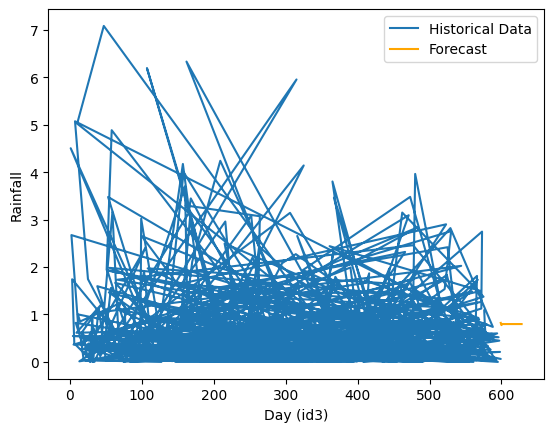

In [32]:
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

# Auto-select the best ARIMA parameters
model = auto_arima(df['rainfall'], seasonal=True, m=30)  # m = seasonality period
print(model.summary())

# Fit and predict
n_forecast = 30  # Forecast next 30 days
model_fit = ARIMA(df['rainfall'], order=model.order).fit()
forecast = model_fit.forecast(steps=n_forecast)

# Plot
plt.plot(df['rainfall'], label='Historical Data')
plt.plot(range(len(df), len(df) + n_forecast), forecast, label='Forecast', color='orange')
plt.xlabel('Day (id3)')
plt.ylabel('Rainfall')
plt.legend()
plt.show()


Summary of the results of a **SARIMAX** (Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors) model fitted to your time series data.

### **1. Model Information**
- **Dep. Variable:** The dependent variable (`y`), which is the target you're modeling (rainfall in your case).
- **No. Observations:** The number of data points used in the model (599 days).
- **Model:** The SARIMAX model parameters (`SARIMAX(2, 0, 0)`):
  - **2:** The number of autoregressive (AR) terms.
  - **0:** The degree of differencing (data stationarity).
  - **0:** The number of moving average (MA) terms.
- **Log Likelihood (-846.150):** A measure of model fit. Higher values indicate a better fit.
- **AIC (1700.300):** Akaike Information Criterion, a metric to compare models. Lower AIC is better.
- **BIC (1717.881):** Bayesian Information Criterion, similar to AIC but penalizes more complex models. Lower is better.
- **HQIC (1707.145):** Hannan-Quinn Information Criterion, another complexity-based comparison metric.

---

### **2. Coefficients**
This section displays the estimated parameters for the SARIMAX model:
- **intercept (0.8091):** The average level of the rainfall (baseline value).
- **ar.L1 (0.0694):** The coefficient of the lag-1 autoregressive term (how much the previous day's rainfall affects today's rainfall). A small but significant positive value indicates a weak short-term dependency.
  - **P>|z| (0.018):** The p-value indicates this term is statistically significant (p < 0.05).
- **ar.L2 (-0.0827):** The coefficient of the lag-2 autoregressive term. The negative coefficient indicates a slight negative dependency, but it is **not statistically significant** (p = 0.147).
- **sigma2 (0.9874):** The variance of the residuals (model error). Lower values indicate better model fit.

---

### **3. Diagnostics**
- **Ljung-Box (Q):** Tests whether the residuals are independent (no autocorrelation).
  - **Prob(Q) = 1.00:** Indicates residuals are independent (good).
- **Jarque-Bera (JB):** Tests whether residuals are normally distributed.
  - **Prob(JB) = 0.00:** Indicates residuals are **not normally distributed** (common in real-world data).
- **Heteroskedasticity (H):** Tests whether residual variance is constant over time.
  - **Prob(H) = 0.01:** Indicates heteroskedasticity (variance changes over time).

---

### **4. Interpretation**
- The model captures some patterns in the rainfall data (significant `ar.L1` term) but has limitations due to:
  - High residual variance (`sigma2`).
  - Non-normal residuals (Jarque-Bera test).
  - Heteroskedasticity.

---

### **5. Next Steps**
- **Improve Model Fit:**
  - Try adding seasonal terms (SARIMAX instead of ARIMAX).
  - Use transformation (e.g., log or square root) to stabilize variance.
  - Incorporate exogenous variables if available (e.g., temperature, humidity).

- **Evaluate Performance:**
  - Plot the actual vs predicted values.
  - Check RMSE or Mean Absolute Error (MAE).



### **3. Machine Learning Models for Prediction**
We can use **linear regression**, **decision trees**, or advanced models like **XGBoost** or **LSTM** for time series predictions.

#### **Steps for ML Modeling**:

1. **Prepare Data**:
   Convert the dataset into features suitable for machine learning:
   
2. **Train a Model**:
   Use a simple regression model for prediction:

In [37]:
# Create lag features
df['lag1'] = df['rainfall'].shift(1)
df['lag2'] = df['rainfall'].shift(2)
df = df.dropna()  # Drop rows with missing values


<ipython-input-37-75a396eed8e0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lag1'] = df['rainfall'].shift(1)
<ipython-input-37-75a396eed8e0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lag2'] = df['rainfall'].shift(2)


MSE: 1.2387397269249543


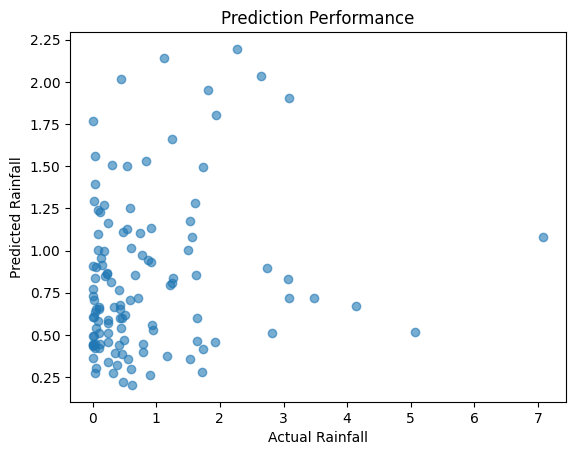

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Split into train and test
X = df[['lag1', 'lag2']]
y = df['rainfall']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))

# Plot predictions
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Actual Rainfall')
plt.ylabel('Predicted Rainfall')
plt.title('Prediction Performance')
plt.show()


In [40]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define and fit the SARIMAX model
model = SARIMAX(df['rainfall'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  # Adjust the parameters as needed
results = model.fit()

# Now you can generate predictions



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [41]:
# In-sample predictions (for the training data range)
predictions = results.get_prediction(start=0, end=len(df) - 1)
predicted_values = predictions.predicted_mean

# Actual values
actual_values = df['rainfall'].values


In [43]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))
print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 1.0477255102895826


In [44]:
from sklearn.metrics import r2_score

# Calculate R² Score
r2 = r2_score(actual_values, predicted_values)
print(f"R² Score: {r2}")



R² Score: -0.09997420763738307


In [45]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(df['id3'], actual_values, label="Actual Rainfall", color="blue")
plt.plot(df['id3'], predicted_values, label="Predicted Rainfall", color="red")
plt.title("Actual vs Predicted Rainfall")
plt.xlabel("Day (id3)")
plt.ylabel("Rainfall")
plt.legend()
plt.show()


KeyError: 'id3'

<Figure size 1000x600 with 0 Axes>